# What is the meaning of happiness?

The [World Happiness Report](https://worldhappiness.report/) is published annually by the [United Nations Sustainable Development Solutions Network (UNSD)](https://www.unsdsn.org/). According to the United Nations, it is "a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be." Data from years [2015–2019](https://www.kaggle.com/unsdsn/world-happiness) is analyzed here.

The following questions are highlighted:

1. How have happiness ranks changed in Serbia, Honduras, and the United States during the past five years?
2. What are the factors that are most closely correlated to happiness in our countries of interest (Serbia, Honduras, USA)?
3. What are the factors that are most closely correlated to happiness across the globe?

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#Loading data
df_2015 = pd.read_csv('data/2015.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')

#In the interest of time, the following data cleaning operations are adapted from https://www.kaggle.com/leonardokobiraki/world-happiness-report-analysis

#Adding years to each df
df_2015['Year']=2015
df_2016['Year']=2016
df_2017['Year']=2017
df_2018['Year']=2018
df_2019['Year']=2019

#Dropping columns specific to some years
df_2015.drop(['Standard Error','Dystopia Residual'], axis=1, inplace=True)
df_2016.drop(['Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'], axis=1, inplace=True)
df_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'], axis=1, inplace=True)

#Renaming columns for consistency
df_2015.rename(columns={'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'Life Expectancy',
        'Trust (Government Corruption)':'Government Trust','Family':'Social Support'},inplace=True)

df_2016.rename(columns={'Economy (GDP per Capita)':'Economy', 'Health (Life Expectancy)':'Life Expectancy',
        'Trust (Government Corruption)':'Government Trust','Family':'Social Support'},inplace=True)

df_2017.rename(columns={'Happiness.Rank':'Happiness Rank', 'Happiness.Score':'Happiness Score',
        'Economy..GDP.per.Capita.':'Economy', 'Health..Life.Expectancy.':'Life Expectancy',
        'Trust..Government.Corruption.':'Government Trust','Family':'Social Support'},inplace=True)

df_2018.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score', 
                        'GDP per capita':'Economy','Social support':'Social Support', 
                        'Healthy life expectancy':'Life Expectancy', 'Freedom to make life choices':'Freedom',                        
                        'Perceptions of corruption':'Government Trust'},inplace=True)

df_2019.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score', 
                        'GDP per capita':'Economy','Social support':'Social Support', 
                        'Healthy life expectancy':'Life Expectancy', 'Freedom to make life choices':'Freedom',                        
                        'Perceptions of corruption':'Government Trust'},inplace=True)

#Setting regions when unavailable
Country_Region=df_2015.set_index('Country')['Region']
df_2017['Region']=df_2017['Country'].map(Country_Region)
df_2018['Region']=df_2018['Country'].map(Country_Region)
df_2019['Region']=df_2019['Country'].map(Country_Region)

#Concatenation
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0, ignore_index=True)

### How have happiness ranks changed in Serbia, Honduras, and the United States during the past five years?

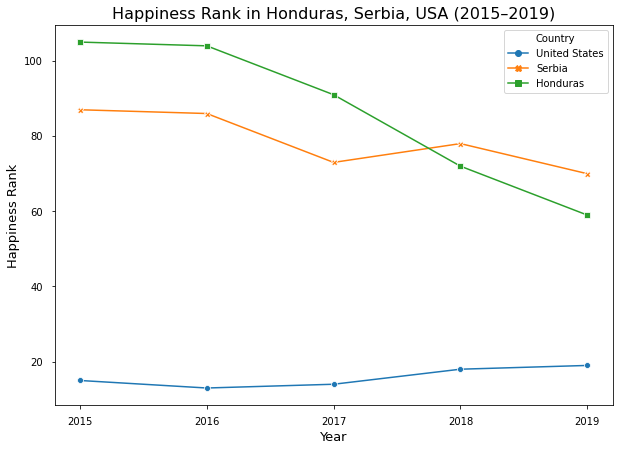

In [185]:
#Subset of df by countries of interest
df_HSU = df.loc[df.Country.isin(['Honduras','Serbia','United States'])]

#Line graphs
plt.figure(figsize=(10,7))
plt.rc('axes', titlesize=16)
plt.rc('axes', labelsize=13)
ax = sns.lineplot(data=df_HSU, x="Year", y="Happiness Rank", hue="Country", style="Country", markers=True, dashes=False)
ax.set(xlabel='Year', ylabel='Happiness Rank', title='Happiness Rank in Honduras, Serbia, USA (2015–2019)')
ax.locator_params(integer=True)
plt.show()

#Variables for percentage calculation
HN_2015 = df_HSU.loc[df_HSU.Country=='Honduras','Happiness Rank'].reset_index()['Happiness Rank'][0]
HN_2019 = df_HSU.loc[df_HSU.Country=='Honduras','Happiness Rank'].reset_index()['Happiness Rank'][4]
HN_change = round((HN_2015-HN_2019)/HN_2015*100, 2)
US_2015 = df_HSU.loc[df_HSU.Country=='United States','Happiness Rank'].reset_index()['Happiness Rank'][0]
US_2019 = df_HSU.loc[df_HSU.Country=='United States','Happiness Rank'].reset_index()['Happiness Rank'][4]
US_change = round((US_2015-US_2019)/US_2015*100, 2)
RS_2015 = df_HSU.loc[df_HSU.Country=='Serbia','Happiness Rank'].reset_index()['Happiness Rank'][0]
RS_2019 = df_HSU.loc[df_HSU.Country=='Serbia','Happiness Rank'].reset_index()['Happiness Rank'][4]
RS_change = round((RS_2015-RS_2019)/RS_2015*100, 2)

**Figure 1:** Honduras appears to become happier during the past five years, lowering its ranking from {{HN_2015}} to {{HN_2019}}, showing an improvement of {{HN_change}}%. The same downward trend is visible in Serbia, going from ranks {{RS_2015}} to {{RS_2019}} (a {{RS_change}}% improvement). The United States has gone from {{US_2015}} to {{US_2019}}, which represents a {{US_change}}% change.


**NOTE**: The smaller the rank, the happier the country. In other words, rank = 1 is the happiest country; rank = 2 is the second happiest, and so forth.

### What are the factors that are most closely correlated to happiness in our countries of interest (Serbia, Honduras, USA)?

The correlation heatmaps below demonstrate the variability of correlation between different features and the overall happiness rank of a country. The data also shows that there is no universal factor that is mostly closely associated with Happiness Rank; it is important to note that these are relationships of correlation, and not necessarily of causality. Not surprisingly, correlations between features and Happiness Rank are negative in Honduras and Serbia, while in the USA the top two more closely correlated features are positive.

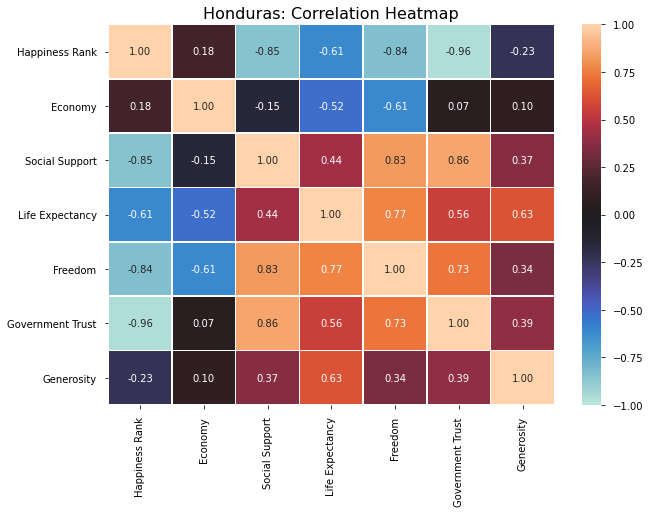

In [214]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(df_HSU.loc[df_HSU.Country=='Honduras'].drop(columns=['Year','Happiness Score']).corr(), annot=True, fmt=".2f", linewidths=.5,vmin=-1, vmax=1, center= 0)  
ax.set(title='Honduras: Correlation Heatmap')
plt.show()

**Figure 2:** In Honduras, the three features which correlate most closely with Happiness Rank are:

1. Government Trust, which affects happiness negatively.
2. Social Support, which affects happiness negatively.
3. Freedom, which affects hapiness negatively.

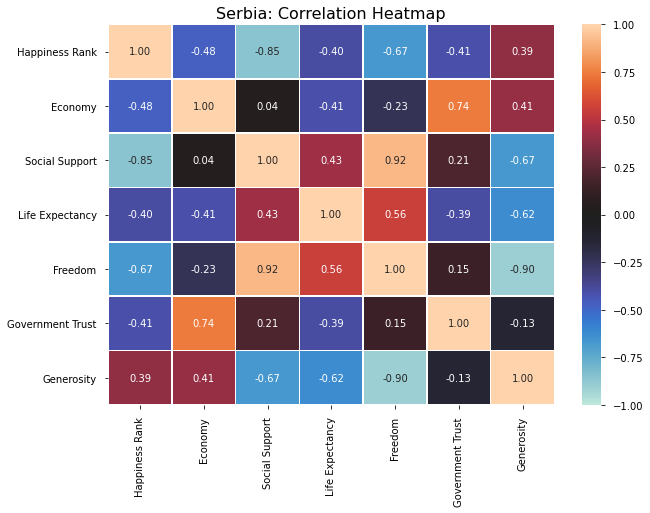

In [207]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(df_HSU.loc[df_HSU.Country=='Serbia'].drop(columns=['Year','Happiness Score']).corr(), annot=True, fmt=".2f", linewidths=.5,vmin=-1, vmax=1, center= 0)  
ax.set(title='Serbia: Correlation Heatmap')
plt.show()

**Figure 3:** In Serbia, the three features which correlate most closely with Happiness Rank are:

1. Social Support, which affects happiness negatively.
2. Freedom, which affects happiness negatively.
3. Economy, which affects hapiness negatively.

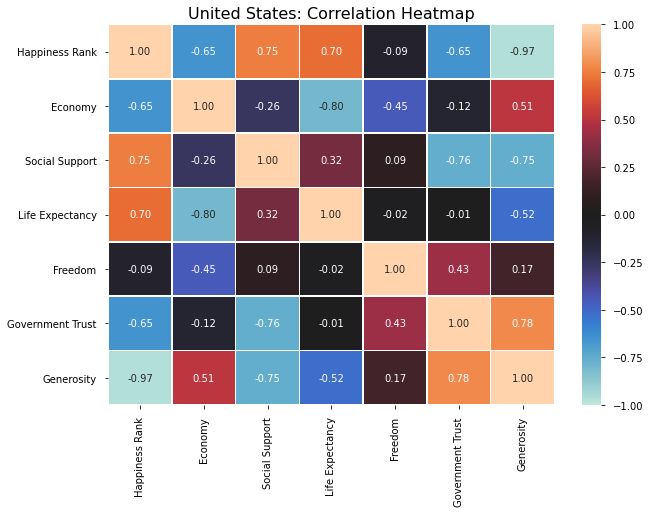

In [209]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(df_HSU.loc[df_HSU.Country=='United States'].drop(columns=['Year','Happiness Score']).corr(), annot=True, fmt=".2f", linewidths=.5,vmin=-1, vmax=1, center= 0)  
ax.set(title='United States: Correlation Heatmap')
plt.show()

**Figure 4:** In the United States, the three features which correlate most closely with Happiness Rank are:

1. Social Support, which affects happiness positively.
2. Life Expectancy, which affects happiness positively.
3. Generosity, which affects hapiness negatively.

### What are the factors that are most closely correlated to happiness across the globe?

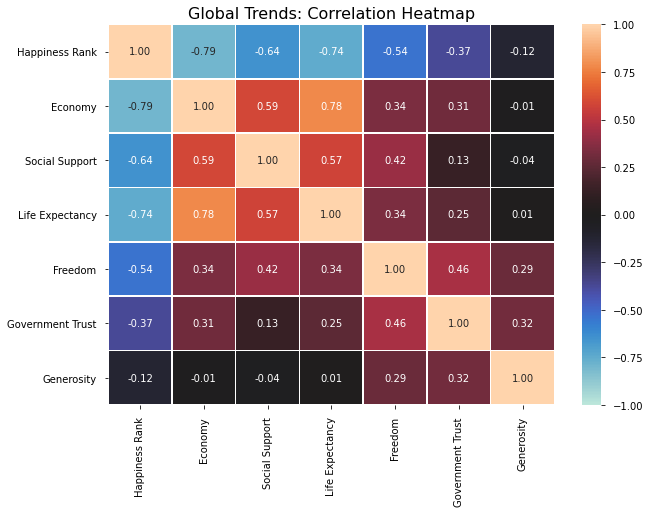

In [213]:
plt.figure(figsize=(10,7))
ax = sns.heatmap(df.drop(columns=['Year','Happiness Score']).corr(), annot=True, fmt=".2f", linewidths=.5,vmin=-1, vmax=1, center= 0)  
ax.set(title='Global Trends: Correlation Heatmap')
plt.show()

**Figure 5:** Globally, the three features which correlate most closely with Happiness Rank are:

1. Economy, which affects happiness negatively.
2. Life Expectancy, which affects happiness negatively.
3. Social Support, which affects hapiness negatively.

### Partial Conclusions

This notebook only scratches the surface of a global dataset, with focus on three countries of interest. Future work could examine the extent to which features predict rank, or the relationship between features across time and geography.